# Predicting Stock Market Using Recurrent Neural Network (RNN) 

## Importing all the required libraries

In [1]:
import math
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt

%matplotlib widget # Use Matplotlib Ipympl 

Using TensorFlow backend.
UsageError: unrecognized arguments: # Use Matplotlib Ipympl


## Loading the dataset

In [2]:
df = pd.read_csv('Tesla.csv', index_col=0, parse_dates=True)
df

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2010-06-29,19.000000,25.000000,17.540001,23.889999,18766300,23.889999
2010-06-30,25.790001,30.420000,23.299999,23.830000,17187100,23.830000
2010-07-01,25.000000,25.920000,20.270000,21.959999,8218800,21.959999
2010-07-02,23.000000,23.100000,18.709999,19.200001,5139800,19.200001
2010-07-06,20.000000,20.000000,15.830000,16.110001,6866900,16.110001
...,...,...,...,...,...,...
2017-03-13,244.820007,246.850006,242.779999,246.169998,3010700,246.169998
2017-03-14,246.110001,258.119995,246.020004,258.000000,7575500,258.000000
2017-03-15,257.000000,261.000000,254.270004,255.729996,4816600,255.729996


## Visualizing the dataset

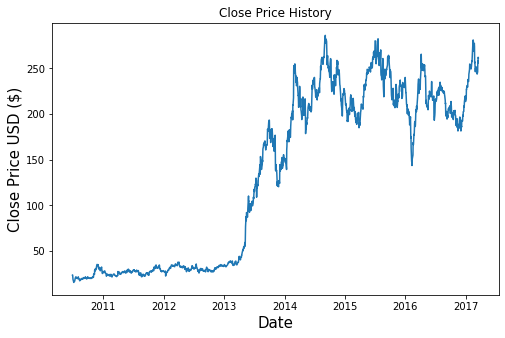

In [3]:
plt.figure(figsize=(8,5))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=15)
plt.ylabel('Close Price USD ($)', fontsize=15)
plt.show()

## Data Preprocessing

### Determining the used data

In [4]:
data = df.filter(['Close']) # Data with only "Close" column

dataset = data.values # Converting data to array

train_data_len = math.ceil(len(dataset)*0.8) # Determining the lenght of training set
                                             # With this, we can also determine the test set in the next line
train_data_len

1354

### Scaling the dataset

In [5]:
scaler = MinMaxScaler(feature_range=(0,1))
data_scaled = scaler.fit_transform(dataset)
data_scaled

array([[0.02993635],
       [0.02971433],
       [0.02279455],
       ...,
       [0.88784039],
       [0.91122698],
       [0.9091918 ]])

### Creating the training set

In [6]:
train_data = data_scaled[0:train_data_len , :]

# Splitting training data into x_train and y_train
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i,0])
    y_train.append(train_data[i,0])
    if i<=61:
        print(x_train)
        print(y_train)
        print()

[array([0.02993635, 0.02971433, 0.02279455, 0.01258141, 0.00114713,
       0.        , 0.00614268, 0.00592066, 0.00462551, 0.00865897,
       0.01494967, 0.01513469, 0.01791   , 0.02260953, 0.01665186,
       0.01635583, 0.01924215, 0.02031528, 0.01905714, 0.01757696,
       0.01820603, 0.01683689, 0.01531972, 0.01894612, 0.02275755,
       0.02020426, 0.01720693, 0.01402457, 0.01406157, 0.01195234,
       0.00777087, 0.00666075, 0.00932504, 0.01102724, 0.01239639,
       0.01099023, 0.01106424, 0.01221137, 0.01602279, 0.01258141,
       0.0151717 , 0.01461664, 0.01443162, 0.01506069, 0.01361752,
       0.01720693, 0.01946418, 0.01942717, 0.01753997, 0.01887211,
       0.01816903, 0.01617081, 0.01820603, 0.01968621, 0.02286856,
       0.01902013, 0.01639284, 0.01946418, 0.01839106, 0.01506069])]
[0.01391355415474397]

[array([0.02993635, 0.02971433, 0.02279455, 0.01258141, 0.00114713,
       0.        , 0.00614268, 0.00592066, 0.00462551, 0.00865897,
       0.01494967, 0.01513469, 0.01

### Converting x_train and y_train to numpy arrays

In [7]:
x_train, y_train = np.array(x_train), np.array(y_train)

### Reshaping the data

In [8]:
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(1294, 60, 1)

## Building the LSTM model

In [9]:
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

## Compiling the model

In [10]:
model.compile(optimizer='adam', loss='mean_squared_error')

## Training the model

In [11]:
model.fit(x_train, y_train, batch_size=1, epochs=1)

Epoch 1/1
1294/1294 [==============================] - 51s 39ms/step - loss: 0.0029


## Creating testing data

In [12]:
test_data = data_scaled[train_data_len - 60:, :]

x_test = []
y_test = dataset[train_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

In [13]:
x_test = np.array(x_test)

In [14]:
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

## Predicting the testing data

In [15]:
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

## Getting the root mean square error

In [16]:
rmse = np.sqrt(np.mean(predictions-y_test)**2)
rmse

3.4368664474360893

## Visualizing the predicted data

C:\Users\ASUS\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


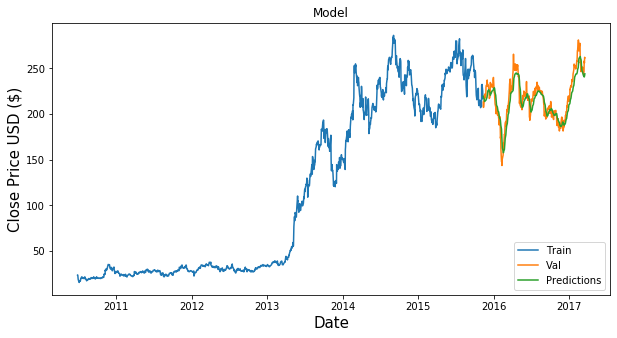

In [17]:
train = data[:train_data_len]
valid = data[train_data_len:]
valid['Predictions'] = predictions

plt.figure(figsize=(10,5))
plt.title('Model')
plt.xlabel('Date', fontsize=15)
plt.ylabel('Close Price USD ($)', fontsize=15)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [18]:
valid

,Close,Predictions
Date,,
2015-11-12,212.940002,219.293076
2015-11-13,207.190002,218.340057
2015-11-16,214.309998,216.468185
2015-11-17,214.000000,214.999008
2015-11-18,221.070007,213.868073
...,...,...
2017-03-13,246.169998,241.212753
2017-03-14,258.000000,240.504745
2017-03-15,255.729996,241.157257
